In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cognates = pd.read_excel('data/cognates_turchin_v3.xlsx', index_col=0)

In [ ]:
def fix_bad_ipa(x):
  if type(x) == str:
    if 'l̄' in x:
      x = re.sub("l̄-ʔ", "ɬː", x)
    if 'lʼ' in x:
      x = re.sub('lʼ', "tɬʼ", x)
    x = re.sub('--', '-', x)
    x = re.sub(r'-([nlr])ʷ-', r'-\g<1>-w-', x)
    x = re.sub('bʲ', 'b', x)
  return x

In [ ]:
cognates = cognates[cognates['yes'] == 1].drop(columns=['bor', 'yes'])
cognates = cognates.applymap(fix_bad_ipa)
cognates

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
оружие_1,j-a-r-a'-ʁ-i,j-a-r-a'-ʁ,NaN,j-a-r-a'-ʁ-i,NaN,NaN
походка_1,b-o-tɬː-e',b-e'-ɬ-a-r-b-aː-r,NaN,b-e-tɬ-i'-r,b-o-tɬʼ-e'-r,NaN
походить_1,b-o-tɬː-o-tɬː-u'-r-u-tɬ-a,b-a'-ɬː-ĩ-l-h-i-l-a\nb-e-ɬ-e'-ɬ-i-l-a,NaN,NaN,NaN,NaN
похищение_1,NaN,qχ-a'-qχ-a-n-a-r,NaN,NaN,NaN,q-a'-q-a-n-a-r
похищать_2,qχː-oː'-n-u-tɬ-a,NaN,NaN,NaN,NaN,q-a'-n-i-ɬ-a
...,...,...,...,...,...,...
ящур_2,NaN,k-e'-r-a,NaN,NaN,NaN,k-e'-r-i
отделение_1,NaN,b-u-tʃ'-a'-n-a-r,NaN,NaN,NaN,b-u-tʃʼ-a'-n-a-r\nb-uˌ-tʃʼ-ã-r\nb-u-tʃʼ-u-tʃʼ...
святой_2,ʃː-eː-χː-i,NaN,NaN,NaN,NaN,ʃː-a'-χː-i
семечки_1,NaN,NaN,NaN,qχ-a-ħ-b-a'-ʃ-u-n-i,NaN,q-a-ħ-b-a'-tɬʼ-e-tʼ-u


In [ ]:
def masking(x):
  if type(x) == str:
    return 1
  else:
    return 0

stat_cognates = cognates.applymap(masking)
LANGS = cognates.columns.tolist()
st_cg_list = stat_cognates.values.tolist()



In [ ]:
count = []
#diff_count = {}

for row in st_cg_list:
  count.append(sum(row))
  

In [ ]:
Counter(count)

Counter({2: 4074, 3: 1487, 4: 560, 5: 227, 6: 33})

<BarContainer object of 5 artists>

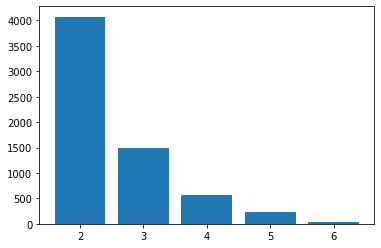

In [ ]:
plt.bar(
    list(Counter(count).keys()),
    list(Counter(count).values()),
    
)

In [ ]:
def lang_string(x):
  return [LANGS[j] for j, y in enumerate(x) if y == 1]

#counter = Counter(['_'.join(lang_string(row)) for row in st_cg_list])

#for k in sorted(sorted(counter), key=len, reverse=True):
#  print("{0}:\t{1}".format(counter[k], k))

In [ ]:
stat_cognates.T.dot(stat_cognates)

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
akhv1239,3316,1578,317,1247,1037,1700
bagv1239,1578,3792,530,1283,816,2367
cham1309,317,530,998,404,179,518
ghod1238,1247,1283,404,2498,846,1109
kara1474,1037,816,179,846,1810,729
tind1238,1700,2367,518,1109,729,3768


In [ ]:
# let's look at rows with all six languages present
cognates.dropna()

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
портиться_2,b-u-qχ-u'-r-u-tɬ-a,b-i'-tʃ'-i-l-a\nb-i-tʃ'-i'-tʃ'-i-l-a,b-iˌ-tʃʼ-i-tʃʼ-l-a\nb-i-tʃʼ-i-tʃʼ-iː'-l-a\nb-i...,b-i-tʃʼ-i',b-i-tʃʼ-a'-ɬ-a,b-iˌ-tʃʼ-i-ɬʲ-a\nb-i-tʃʼ-i-tʃʼ-i'-ɬʲ-a
портить_3,b-u-qχ-oː'-r-u-tɬ-a,b-i-tʃ'-a'-j-l-a\nb-i-tʃ'-i-tʃ'-a'-j-l-a,b-i-tʃʼ-aː'-l-a\nb-i-tʃʼ-i-tʃʼ-aː'-l-a,b-i'-tʃʼ-a-l-i,b-i-tʃʼ-a'-tʃʼ-aː-ɬ-a,b-i-tʃʼ-aː'-j-ɬʲ-a\nb-i-tʃʼ-i-tʃʼ-aː'-j-ɬʲ-a
радоваться_1,b-e-χː-u'-r-u-tɬ-a,b-i'-χː-i-l-a\nb-i-χː-i'-χː-i-l-a,b-iˌ-χː-i-χː-l-a\nb-i-χː-i-χː-iː'-l-a\nb-iˌ-χː...,b-i-χː-i'-b-u-kʲ-i,b-e'-tsː-e-χː-a-ɬ-a,b-iˌ-χː-i-ɬʲ-a
оставаться_1,b-i-χː-u'-r-u-tɬ-a,b-u'-χː-u-l-a\nb-u-χː-u'-χː-i-l-a,b-eˌ-χʷ-n-a\nb-e-χː-uː'-n-a\nb-eˌ-χː-u-χː-n-a\...,b-u-χː-ĩ',b-i'-χːʷ-a-ɬ-a,b-uˌ-χː-i-ɬʲ-a\nb-u-χː-u'-χː-i-ɬʲ-a
по восемь_1,b-i-tɬʼː-i-b-i-tɬʼː-i'-d-a,b-i-tɬ'-i'-b-i-tɬ'-i,b-e-tɬʼ-i-tɬʼ-i'-d-a,b-i-tɬʼ-i-b-i-tɬʼ-i'-d-a,b-i-tɬ-i'-b-i-tɬ-i-d-a,b-i-tɬʼ-i'-b-i-tɬʼ-i-j-a
тесто_1,a-t’-a'-tɬː-i,h-a-t',h-a-tʼ,h-a-tʼ-i',h-a-tʼ-'e,h-a'-tʼ-a
тратить_1,b-u-qχ-oː'-r-u-tɬ-a,b-i-tʃ'-a'-j-l-a\nb-i-tʃ'-i-tʃ'-a'-j-l-a,b-i-tʃʼ-aː'-l-a\nb-i-tʃʼ-i-tʃʼ-aː'-l-a,b-i'-tʃʼ-a-l-i,b-i-tʃʼ-a'-tʃʼ-aː-ɬ-a,b-i-tʃʼ-aː'-j-ɬʲ-a\nb-i-tʃʼ-i-tʃʼ-aː'-j-ɬʲ-a
такой_4,h-a-tɬ-e'-ʃ-t-a-b-e,a-l-h-a-ʃː-d-u'-b\no-l-h-a-ʃː-d-u'-b,a'-tɬʼ-i-sː\na-ɬ-a'-tɬʼ-i-sː,h-a-tɬʼ-a'-sː-u\nh-e-tɬʼ-a'-sː-u\nh-o-tɬʼ-a'-s...,h-a-ɬ-i-ʃ-d-o'-b\nh-u-ɬ-i'-ʃ-d-o-b,a-tɬʼ-u'-b\na-ɬ-a-tɬʼ-u'-b\nh-ũ'-tɬʼ-u-b\no-t...
так_2,h-a-tɬ-e'-ʃ-t-e,a'-l-h-a-ʃː-d-a\no-l-h-a'-ʃː-d-a,a-tɬʼ\na-ɬ-a'-tɬʼ,h-a-tɬʼ-a'\nh-e-tɬʼ-a'\nh-o-tɬʼ-a'\nh-u-tɬʼ-a',h-u-ɬ-i'-ʃː-d-a,o-ɬ-a'-tɬʼ-a
удлиняться_1,b-a-χː-a-ɬ-u'-r-u-tɬ-a,b-e-χː-a'-l-h-i-l-a,b-e-χː-i'-l-a-ɬ-l-a\nb-e-χː-i'-l-a-ɬ-iː-l-a,b-e-χː-i-l-a-ɬ-i',b-e'-χː-e-l-a-ɬ-a-ɬ-a,b-e-χː-a'-l-a-ɬ-i-ɬʲ-a


In [ ]:
cogn_dict = cognates.to_dict('list')
ipa_chars = {}
for l in cogn_dict:
  #print(l)
  
  symb = []
  for row in cogn_dict[l]:
    if type(row) != float:
      for x in row.split('\n'):
        symb.extend(x.split('-'))
  val = list(set(symb))
  ipa_chars[l] = val

In [ ]:
def listing(x):
  if type(x) != str:
    return x
  else:
    return x.split('\n')

cognates = cognates.applymap(listing)
cognates

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
оружие_1,[j-a-r-a'-ʁ-i],[j-a-r-a'-ʁ],NaN,[j-a-r-a'-ʁ-i],NaN,NaN
походка_1,[b-o-tɬː-e'],[b-e'-ɬ-a-r-b-aː-r],NaN,[b-e-tɬ-i'-r],[b-o-tɬʼ-e'-r],NaN
походить_1,[b-o-tɬː-o-tɬː-u'-r-u-tɬ-a],"[b-a'-ɬː-ĩ-l-h-i-l-a, b-e-ɬ-e'-ɬ-i-l-a]",NaN,NaN,NaN,NaN
похищение_1,NaN,[qχ-a'-qχ-a-n-a-r],NaN,NaN,NaN,[q-a'-q-a-n-a-r]
похищать_2,[qχː-oː'-n-u-tɬ-a],NaN,NaN,NaN,NaN,[q-a'-n-i-ɬ-a]
...,...,...,...,...,...,...
ящур_2,NaN,[k-e'-r-a],NaN,NaN,NaN,[k-e'-r-i]
отделение_1,NaN,[b-u-tʃ'-a'-n-a-r],NaN,NaN,NaN,"[b-u-tʃʼ-a'-n-a-r, b-uˌ-tʃʼ-ã-r, b-u-tʃʼ-u-tʃ..."
святой_2,[ʃː-eː-χː-i],NaN,NaN,NaN,NaN,[ʃː-a'-χː-i]
семечки_1,NaN,NaN,NaN,[qχ-a-ħ-b-a'-ʃ-u-n-i],NaN,[q-a-ħ-b-a'-tɬʼ-e-tʼ-u]


In [ ]:
sonorList = []

for l in ipa_chars:
  for ch in sorted(ipa_chars[l]):
    if 'l' in ch or 'm' in ch or 'r' in ch or 'n' in ch or 'j' in ch:
      sonorList.append(ch)

sonorList = list(set(sonorList))

In [ ]:
VOCALS = []

for l in ipa_chars:
  for ch in sorted(ipa_chars[l]):
    if "a" in ch or 'e' in ch or 'u' in ch or 'i' in ch or 'o' in ch:
      VOCALS.append(ch)

VOCALS = list(set(VOCALS))
VOCALS

["'i",
 "u'",
 'ĩˌ',
 'ẽ',
 "oː'",
 'oː',
 'uˌ',
 "e'",
 "'o",
 'eːˌ',
 'oˌ',
 'ũˌ',
 'o',
 'u',
 "iː'",
 'ã',
 "'aː",
 "a'",
 "i'",
 'eː',
 "ẽ'",
 'i',
 'ĩːˌ',
 'iː',
 "ẽː'",
 'ãˌ',
 "'e",
 'ũː',
 "'a",
 'e',
 "uː'",
 'aˌ',
 'ũːˌ',
 'õː',
 'aː',
 "ĩ'",
 "õː'",
 'ũ',
 "ãː'",
 'ĩː',
 'aːˌ',
 "'eː",
 "ũ'",
 'ãːˌ',
 'ĩ',
 'eˌ',
 'a',
 "ã'",
 'ãː',
 "o'",
 'iˌ',
 'õ',
 'oːˌ',
 "'u",
 'uː',
 "aː'",
 "eː'",
 'iːˌ',
 'ẽː',
 "ĩː'"]

In [ ]:
sonorList

['l', 'rː', 'nʷ', 'j', 'r', 'lʷ', 'm', 'lː', 'n', 'mː', 'rʷ', 'nː']

In [ ]:
def cv_represent(x):
  output = []
  if type(x) != float:
    for word in x:
      wordCV = ''
      for ch in word.split('-'):
        if "a" in ch or 'e' in ch or 'u' in ch or 'i' in ch or 'o' in ch:
          wordCV += 'V'
        elif ch != '':
          wordCV += 'C'
      output.append(wordCV)
    return list(set(output))
  else:
    return x

In [ ]:
def sov_represent(x):
  output = []
  if type(x) != float:
    for word in x:
      wordCV = ''
      for ch in word.split('-'):
        if "a" in ch or 'e' in ch or 'u' in ch or 'i' in ch or 'o' in ch:
          wordCV += 'V'
        elif ch in sonorList:
          wordCV += 'S'
        elif ch == 'b' or ch == 'bʲ':
          wordCV += 'b'
        elif ch != '':
          wordCV += 'O'
      output.append(wordCV)
    return list(set(output))
  else:
    return x

In [ ]:
cv_cogn = cognates.applymap(cv_represent)
cv_cogn

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
оружие_1,[CVCVCV],[CVCVC],NaN,[CVCVCV],NaN,NaN
походка_1,[CVCV],[CVCVCCVC],NaN,[CVCVC],[CVCVC],NaN
походить_1,[CVCVCVCVCV],"[CVCVCCVCV, CVCVCVCV]",NaN,NaN,NaN,NaN
похищение_1,NaN,[CVCVCVC],NaN,NaN,NaN,[CVCVCVC]
похищать_2,[CVCVCV],NaN,NaN,NaN,NaN,[CVCVCV]
...,...,...,...,...,...,...
ящур_2,NaN,[CVCV],NaN,NaN,NaN,[CVCV]
отделение_1,NaN,[CVCVCVC],NaN,NaN,NaN,"[CVCVCVCVC, CVCVC, CVCVCVC]"
святой_2,[CVCV],NaN,NaN,NaN,NaN,[CVCV]
семечки_1,NaN,NaN,NaN,[CVCCVCVCV],NaN,[CVCCVCVCV]


In [ ]:
sovb_cogn = cognates.applymap(sov_represent)
sovb_cogn 

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
оружие_1,[SVSVOV],[SVSVO],NaN,[SVSVOV],NaN,NaN
походка_1,[bVOV],[bVOVSbVS],NaN,[bVOVS],[bVOVS],NaN
походить_1,[bVOVOVSVOV],"[bVOVSOVSV, bVOVOVSV]",NaN,NaN,NaN,NaN
похищение_1,NaN,[OVOVSVS],NaN,NaN,NaN,[OVOVSVS]
похищать_2,[OVSVOV],NaN,NaN,NaN,NaN,[OVSVOV]
...,...,...,...,...,...,...
ящур_2,NaN,[OVSV],NaN,NaN,NaN,[OVSV]
отделение_1,NaN,[bVOVSVS],NaN,NaN,NaN,"[bVOVSVS, bVOVOVSVS, bVOVS, bVOVOVS]"
святой_2,[OVOV],NaN,NaN,NaN,NaN,[OVOV]
семечки_1,NaN,NaN,NaN,[OVObVOVSV],NaN,[OVObVOVOV]


In [ ]:
def first_last(x, task):
  output = []
  if type(x) == list:
    for y in x:
      Y = y.split("V")
      if task == 'last' or task == 'l':
        T = Y[-1]
      elif task == 'first' or task == 'f':
        T = Y[0]
      if T == '':
          output.append('#')
      else:
          output.append(T)
    return output
  else:
    return x

def FIRST_last(x):
  return first_last(x, 'f')

def first_LAST(x):
  return first_last(x, 'l')

In [ ]:
sovb_first_init = sovb_cogn.applymap(FIRST_last)
sovb_last_final = sovb_cogn.applymap(first_LAST)
cv_first_init = cv_cogn.applymap(FIRST_last)
cv_last_final = cv_cogn.applymap(first_LAST)

In [ ]:
sovb_first_init

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
оружие_1,[S],[S],NaN,[S],NaN,NaN
походка_1,[b],[b],NaN,[b],[b],NaN
походить_1,[b],"[b, b]",NaN,NaN,NaN,NaN
похищение_1,NaN,[O],NaN,NaN,NaN,[O]
похищать_2,[O],NaN,NaN,NaN,NaN,[O]
...,...,...,...,...,...,...
ящур_2,NaN,[O],NaN,NaN,NaN,[O]
отделение_1,NaN,[b],NaN,NaN,NaN,"[b, b, b, b]"
святой_2,[O],NaN,NaN,NaN,NaN,[O]
семечки_1,NaN,NaN,NaN,[O],NaN,[O]


In [ ]:
#count_columns
def column_counter(df):
  df_counter = {}
  df_dict = df.to_dict('list')
  for lang in df_dict:
    df_counter[lang] = {}
    for row in df_dict[lang]:
      if type(row) == list:
        for x in row:
          if x in df_counter[lang]:
            df_counter[lang][x] += 1
          else:
            df_counter[lang][x] = 1
  return df_counter

In [ ]:
sv_fi_count = column_counter(sovb_first_init)
sv_fi_count

{'akhv1239': {'#': 304, 'O': 2004, 'S': 449, 'b': 559},
 'bagv1239': {'#': 434, 'O': 2285, 'S': 448, 'b': 935, 'bO': 1},
 'cham1309': {'#': 237, 'O': 119, 'b': 1124},
 'ghod1238': {'#': 167, 'O': 1610, 'OSSOSSS': 1, 'S': 370, 'b': 494},
 'kara1474': {'#': 156, 'O': 1224, 'S': 243, 'b': 284},
 'tind1238': {'#': 416, 'O': 2397, 'OSS': 1, 'S': 403, 'b': 1122}}

In [ ]:
def search_for_it(chs, idx, cognates=cognates):
  if chs in row[idx]:
    print(ruword, row[idx], LANGS[idx])
    print(cognates.loc[ruword,LANGS[idx]])

for ruword, row in sovb_first_init.iterrows():
  if type(row[1]) == list:
    search_for_it('bO', 1)
  if type(row[3]) == list:
    search_for_it('OSSOSSS', 3)
  if type(row[5]) == list:
    search_for_it('OSS', 5)

тпру_1 ['OSSOSSS'] ghod1238
['d-r-r-d-r-r-r']
тпру_1 ['OSS'] tind1238
['d-r-r-u']
реветь (о быке)_1 ['bO'] bagv1239
["b-ʕ-uː'-l-iː-l-a"]


In [ ]:
sv_lf_count = column_counter(sovb_last_final)
sv_lf_count

{'akhv1239': {'#': 3313, 'O': 2, 'S': 1},
 'bagv1239': {'#': 1770,
  'O': 460,
  'OO': 6,
  'S': 1332,
  'SO': 38,
  'SS': 3,
  'Sb': 3,
  'b': 489,
  'bO': 2},
 'cham1309': {'#': 1191, 'O': 133, 'OO': 1, 'S': 70, 'SO': 1, 'b': 84},
 'ghod1238': {'#': 2094, 'O': 24, 'OSSOSSS': 1, 'S': 348, 'SO': 3, 'b': 172},
 'kara1474': {'#': 1112, 'O': 161, 'S': 386, 'SO': 17, 'Sb': 1, 'b': 230},
 'tind1238': {'#': 2516, 'O': 43, 'S': 1346, 'SO': 1, 'Sb': 1, 'b': 432}}

In [ ]:
xxx = {'akhv1239': {'#': 3313, 'O': 2, 'S': 1},
 'bagv1239': {'#': 1770,
  'O': 460,
  'OO': 6,
  'S': 1332,
  'SO': 38,
  'SS': 3,
  'Sb': 3,
  'b': 489,
  'bO': 2},
 'cham1309': {'#': 1191, 'O': 133, 'OO': 1, 'S': 70, 'SO': 1, 'b': 84},
 'ghod1238': {'#': 2094, 'O': 24, 'OSSOSSS': 1, 'S': 348, 'SO': 3, 'b': 172},
 'kara1474': {'#': 1112, 'O': 161, 'S': 386, 'SO': 17, 'Sb': 1, 'b': 230},
 'tind1238': {'#': 2516, 'O': 43, 'S': 1346, 'SO': 1, 'Sb': 1, 'b': 432}}

for l in xxx:
  lf0 = 0
  lf1 = 0
  lf2 = 0
  for key in xxx[l]:
     if key == '#':
        lf0 = xxx[l]['#']
     elif len(key) == 1:
        lf1 += xxx[l][key]
     else:
        lf2 += xxx[l][key]
  print('{0}\t{1}\t{2}\t{3}\t{4}'.format(l, lf0, lf1, lf2, lf0 / (lf1 + lf2)))

akhv1239	3313	3	0	1104.3333333333333
bagv1239	1770	2281	52	0.7586798114016288
cham1309	1191	287	2	4.1211072664359865
ghod1238	2094	544	4	3.821167883211679
kara1474	1112	777	18	1.3987421383647798
tind1238	2516	1821	2	1.3801426220515634


In [ ]:
460 + 6 + 1332 + 38 + 3 + 3 + 489 + 2

2333

In [ ]:
for ruword, row in sovb_last_final.iterrows():
  if type(row[2]) == list:
    search_for_it('OO', 2)

трефы_1 ['OO'] cham1309
["a-tʃʼ-i'-χː-w"]


In [ ]:
cv_FI = column_counter(cv_first_init)

{'akhv1239': {'#': 304, 'C': 3012},
 'bagv1239': {'#': 410, 'C': 3653, 'CC': 1},
 'cham1309': {'#': 227, 'C': 1243},
 'ghod1238': {'#': 166, 'C': 2468, 'CCCCCCC': 1},
 'kara1474': {'#': 155, 'C': 1748},
 'tind1238': {'#': 384, 'C': 3900, 'CCC': 1}}

In [ ]:
column_counter(cv_last_final)

{'akhv1239': {'#': 3313, 'C': 3},
 'bagv1239': {'#': 1767, 'C': 2245, 'CC': 52},
 'cham1309': {'#': 1186, 'C': 282, 'CC': 2},
 'ghod1238': {'#': 2088, 'C': 543, 'CC': 3, 'CCCCCCC': 1},
 'kara1474': {'#': 1110, 'C': 775, 'CC': 18},
 'tind1238': {'#': 2499, 'C': 1784, 'CC': 2}}

In [ ]:
#last_final_ratio
#for lang in column_counter:
  

In [ ]:
def intervocal(x):
  output = []
  if type(x) == list:
    for y in x:
      Y = y.split("V")
      output.append(Y[1:-1])
    return output
  else:
    return x

In [ ]:
sovb_inter_voc = sovb_cogn.applymap(intervocal)
cv_inter_voc = cv_cogn.applymap(intervocal)

In [ ]:
def IV_column_counter(df):
  df_counter = {}
  df_dict = df.to_dict('list')
  for lang in df_dict:
    df_counter[lang] = {}
    for row in df_dict[lang]:
      if type(row) == list:
        for X in row:
          for x in X:
            if x in df_counter[lang]:
              df_counter[lang][x] += 1
            else:
              df_counter[lang][x] = 1
  return df_counter

In [ ]:
sovb_IV_counter = IV_column_counter(sovb_inter_voc)
cv_IV_counter = IV_column_counter(cv_inter_voc)

In [ ]:
cv_IV_counter

{'akhv1239': {'': 6, 'C': 8395, 'CC': 138},
 'bagv1239': {'': 36, 'C': 5807, 'CC': 1558, 'CCC': 139, 'CCCC': 3},
 'cham1309': {'': 1, 'C': 2130, 'CC': 557, 'CCC': 11},
 'ghod1238': {'': 58, 'C': 4184, 'CC': 740, 'CCC': 3},
 'kara1474': {'': 18, 'C': 2831, 'CC': 482, 'CCC': 3},
 'tind1238': {'': 31, 'C': 7766, 'CC': 971, 'CCC': 4}}

In [ ]:
cognates.loc['пятьдесят_1', 'akhv1239']

nan

In [ ]:
def IV_search_for_it(chs, idx, cognates=cognates):
  for X in row[idx]:
    if chs in X:
      print(ruword, row[idx], LANGS[idx])
      print(cognates.loc[ruword,LANGS[idx]])

for ruword, row in cv_inter_voc.iterrows():
  if type(row[1]) == list:
    IV_search_for_it('CCCC', 1)
  if type(row[3]) == list:
    IV_search_for_it('CCC', 3)
  if type(row[4]) == list:
    IV_search_for_it('CCC', 4)
  if type(row[5]) == list:
    IV_search_for_it('CCC', 5)

покалечиться_1 [['CCCC', 'C']] bagv1239
["ʕ-a'-j-b-l-h-i-l-a"]
покалечиться_1 [['CCC', 'C']] tind1238
["ʕ-aː'-j-m-ɬ-i-ɬʲ-a"]
пятьсот_1 [['CCCC', 'C']] bagv1239
["i'-n-ʃːʷ-d-b-e-ʃ-e-n"]
пятьсот_1 [['CCC', 'C', 'C', 'C', 'C']] ghod1238
["i-n-ʃ-tː-u'-b-e-ʃ-e-n-u-d-a"]
пятьдесят_1 [['CCC', 'C', 'C', 'C'], ['CCC', 'C', 'C']] ghod1238
["i-n-ʃ-tː-u-tsʼ-a'-l-i", "i-n-ʃ-tː-u-tsʼ-a'-l-i-ɬ-i"]
пятьдесят_1 [['CCC', 'C', 'C', 'C'], ['CCC', 'C', 'C']] ghod1238
["i-n-ʃ-tː-u-tsʼ-a'-l-i", "i-n-ʃ-tː-u-tsʼ-a'-l-i-ɬ-i"]
так_3 [['C', 'CC'], ['C', 'CCC']] kara1474
["h-a-ɡ-i'-ʃ-d-j-a", "h-u-ɡ-i'-ʃ-d-a"]
бесполезный_1 [['CCC', 'C']] tind1238
["χ-aː'-j-r-h-i-kʼʲ-u-b"]
бабушка_1 [['CC', 'CCC']] kara1474
["h-e-r-kʼ-a'-j-l-j-a"]
выгодно_1 [['CCC']] tind1238
["χ-a'-j-r-kʼʲ-aː"]
наоборот_1 [['CCC']] kara1474
["ʕ-a-k-s-j-'a"]
увечье_1 [['CCCC']] bagv1239
["ʕ-a'-j-b-l-h-a-r"]
увечье_1 [['CCC']] tind1238
["ʕ-aː'-j-m-ɬ-a-r"]


In [ ]:
for ruword, row in cv_inter_voc.iterrows():
  if type(row[1]) == list:
    IV_search_for_it('CCC', 1)

послушание_1 [['C', 'CCC'], ['C', 'CC']] bagv1239
["qχ'-a-h-a'-r-l-h-a-r", "qχ'-a-h-a'-l-h-a-r"]
привыкание_1 [['C', 'CCC']] bagv1239
["r-u-h-u'-n-l-h-a-r"]
приводить в негодность_1 [['CCC', 'CC'], ['CC', 'CC']] bagv1239
["t-o'-χ-l-h-a-j-l-a", "t-o'-χ-h-a-j-l-a"]
приведение в негодность_1 [['CCC', 'C']] bagv1239
["t-o'-χ-l-h-a-l-a-r"]
покоряться_1 [['C', 'CCC', 'C']] bagv1239
["m-u-t'-i'-ʕ-l-h-i-l-a"]
покорять_1 [['C', 'CCC', 'CC']] bagv1239
["m-u-t'-i'-ʕ-l-h-a-j-l-a"]
покорение_1 [['C', 'CCC', 'C'], ['C', 'CCC']] bagv1239
["m-u-t'-i'-ʕ-l-h-a-l-a-r", "m-u-t'-i'-ʕ-l-h-a-r"]
покорение_1 [['C', 'CCC', 'C'], ['C', 'CCC']] bagv1239
["m-u-t'-i'-ʕ-l-h-a-l-a-r", "m-u-t'-i'-ʕ-l-h-a-r"]
подсинивание_1 [['CCC', 'C']] bagv1239
["qχ-a'-j-l-h-a-l-a-r"]
популярность_1 [['CC', 'CCC']] bagv1239
["m-a-ʃ-h-u'-r-l-h-a-r"]
пятьсот_2 [['CCC', 'C', 'CC']] bagv1239
["ĩ-ʃːʷ-d-b-e-ʃ-e'-n-d-a"]
пятьдесят_1 [['CCC']] bagv1239
["i'-n-ʃːʷ-d-a-ts'"]
распутство_1 [['C', 'CCC']] bagv1239
["sː-a-j-a'-qχ-l-h-a-r"]
расп

In [ ]:
sovb_IV_counter

{'akhv1239': {'': 6,
  'O': 4923,
  'OO': 110,
  'OS': 12,
  'Ob': 2,
  'S': 2897,
  'SO': 8,
  'Sb': 6,
  'b': 575},
 'bagv1239': {'': 36,
  'O': 3484,
  'OO': 201,
  'OOb': 1,
  'OS': 82,
  'OSO': 60,
  'Ob': 29,
  'S': 2188,
  'SO': 835,
  'SOO': 7,
  'SOOb': 1,
  'SOS': 2,
  'SOb': 1,
  'SS': 328,
  'SSO': 63,
  'Sb': 28,
  'SbSO': 2,
  'b': 213,
  'bO': 56,
  'bS': 11,
  'bSO': 5,
  'bb': 1},
 'cham1309': {'': 1,
  'O': 1388,
  'OO': 83,
  'OOS': 5,
  'OS': 400,
  'Ob': 18,
  'S': 704,
  'SO': 46,
  'SOO': 2,
  'SOS': 4,
  'SS': 5,
  'Sb': 10,
  'b': 46,
  'bO': 3},
 'ghod1238': {'': 58,
  'O': 2790,
  'OO': 116,
  'OS': 37,
  'Ob': 10,
  'S': 1121,
  'SO': 471,
  'SOO': 3,
  'SS': 71,
  'Sb': 16,
  'b': 285,
  'bO': 20,
  'bS': 2},
 'kara1474': {'': 18,
  'O': 2051,
  'OO': 109,
  'OOS': 2,
  'OS': 43,
  'Ob': 11,
  'S': 636,
  'SO': 243,
  'SS': 25,
  'SSS': 1,
  'Sb': 13,
  'b': 150,
  'bO': 37,
  'bS': 1},
 'tind1238': {'': 31,
  'O': 5603,
  'OO': 123,
  'OS': 38,
  'Ob': 8,


In [ ]:
def syllable_division(x):
  chs = x.split('-')
  mask = ""
  for c in chs:
    if c in VOCALS:
      mask += 'v'
    else:
      mask += 'c'
  mask_l = mask.split('v')
  if len(mask_l) == 1:
    return []
  else:
    n_syl = len(mask_l) - 1
    
    syls = []
    #cursor = 0
    syl_start = 0
    syl_end = 0
    #syl_go = False
    for i, cv in enumerate(mask_l):
      if i == 0:
        syl_end += len(cv) + 1
      elif i <= n_syl and i > 0:
        if len(cv) > 0:
          syl_end += len(cv) - 1
        syls.append((syl_start, syl_end))
        syl_start = syl_end
        if len(cv) > 0:
          syl_end += 2
        else:
          syl_end += 1
        
          
      else:
        syls.append((syl_start, len(chs)))
    SYLS = []
    for I, syl in enumerate(syls):
      st = syl[0]
      en = syl[1]
      #sep needed?
      if I + 1 == len(syls):
        SYLS.append('-'.join(chs[st:]))
      elif I == 0:
        SYLS.append('#-' + '-'.join(chs[st:en]))
      else:
        SYLS.append('-'.join(chs[st:en]))
    
    SYLS[-1] += "-" + '#'
    return SYLS

In [ ]:
newDf = {}

def check_len(y):
  ones = []
  lens = []
  for x in y:
    if type(x) != float:
      if len(x) - 1 > 0:
        ones.append(1)
      lens.append(len(x))
  if sum(ones) > 1 or sum(ones) == 0:
    return 0
  else:
    return max(lens)

def amount_of_rows(l):
  return max([len(x) for x in l])

for ruword, row in cognates.iterrows():
  mNum = check_len(row)
  

  # 0 or 1 lang repeats
  if mNum == 0:
    new_row = []
    for lang in row:
      if type(lang) == float:
        new_row.append([])
      else:
        new_row.append(syllable_division(lang[0]))
    for i in range(amount_of_rows(new_row)):
      ROW = []
      for l in new_row:
        try:
          ROW.append(l[i])
        except:
          ROW.append('')
      key = ruword + '_1_' + str(i+1)
      newDf[key] = ROW

  else:
    new_set_rows = {}
    for idx, lang in enumerate(row):
      if type(lang) == float:
        new_set_rows[idx] = [[]] * mNum
      elif len(lang) == 1:
        new_set_rows[idx] = [syllable_division(lang[0])] * mNum
      else:
        new_lang = []
        for w in lang:
          new_lang.append(syllable_division(w))
        new_set_rows[idx] = new_lang
    for j in range(mNum):
      
      new_row = []
      for l in new_set_rows:
        new_row.append(new_set_rows[l][j])
      for i in range(amount_of_rows(new_row)):
        ROW = []
        for L in new_row:
          try:
            ROW.append(L[i])
          except:
            ROW.append('')
        key = ruword + "_" + str(j+1) + "_" + str(i+1)
        newDf[key] = ROW

In [ ]:
target = pd.DataFrame.from_dict(newDf, orient='index', columns=LANGS)
target

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
оружие_1_1_1,#-j-a,#-j-a,,#-j-a,,
оружие_1_1_2,r-a',r-a'-ʁ-#,,r-a',,
оружие_1_1_3,ʁ-i-#,,,ʁ-i-#,,
походка_1_1_1,#-b-o,#-b-e',,#-b-e,#-b-o,
походка_1_1_2,tɬː-e'-#,ɬ-a-r,,tɬ-i'-r-#,tɬʼ-e'-r-#,
...,...,...,...,...,...,...
семечки_1_1_2,,,,b-a',,b-a'
семечки_1_1_3,,,,ʃ-u,,tɬʼ-e
семечки_1_1_4,,,,n-i-#,,tʼ-u-#
одеяло_1_1_1,#-ĩ,#-i-r,,,#-u-r,


In [ ]:
cognates.loc[['потомство_1']]

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
потомство_1,[n-a'-s-i-l-o],[n-a'-s-l-o],NaN,[n-a'-s-l-u],NaN,NaN


In [ ]:
target.head(50)

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
оружие_1_1_1,#-j-a,#-j-a,,#-j-a,,
оружие_1_1_2,r-a',r-a'-ʁ-#,,r-a',,
оружие_1_1_3,ʁ-i-#,,,ʁ-i-#,,
походка_1_1_1,#-b-o,#-b-e',,#-b-e,#-b-o,
походка_1_1_2,tɬː-e'-#,ɬ-a-r,,tɬ-i'-r-#,tɬʼ-e'-r-#,
походка_1_1_3,,b-aː-r-#,,,,
походить_1_1_1,#-b-o,#-b-a',,,,
походить_1_1_2,tɬː-o,ɬː-ĩ-l,,,,
походить_1_1_3,tɬː-u',h-i,,,,
походить_1_1_4,r-u,l-a-#,,,,


KeyError: ignored

In [ ]:
target.head(50)

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
оружие_1_1_1,#-j-a,#-j-a,,#-j-a,,
оружие_1_1_2,r-a',r-a'-ʁ-#,,r-a',,
оружие_1_1_3,ʁ-i-#,,,ʁ-i-#,,
походка_1_1_1,#-b-o,#-b-e',,#-b-e,#-b-o,
походка_1_1_2,tɬː-e'-#,ɬ-a-r,,tɬ-i'-r-#,tɬʼ-e'-r-#,
походка_1_1_3,,b-aː-r-#,,,,
походить_1_1_1,#-b-o,#-b-a',,,,
походить_1_1_2,tɬː-o,ɬː-ĩ-l,,,,
походить_1_1_3,tɬː-u',h-i,,,,
походить_1_1_4,r-u,l-a-#,,,,


In [ ]:
def new_represent(x, how):
  
  if type(x) != float:
    if x != "":
      wordCV = ''
      for ch in x.split('-'):
        if how == 'cv':
          if ch in VOCALS:
            wordCV += 'V'
          elif ch == '#':
            wordCV += '#'
          elif ch != "":
            wordCV += 'C'
        
        elif how == 'sov' or how == 'sovb':
          if ch in VOCALS:
            wordCV += 'V'
          elif ch == '#':
            wordCV += '#'
          elif ch in sonorList:
            wordCV += 'S'
          #elif ch == 'b' or ch == 'bʲ':
          #  wordCV += 'b'
          elif ch != '':
            wordCV += 'O'
      return wordCV
    else:
      return x
  else:
    return x

def syl_cv(x):
  return new_represent(x, 'cv')

def syl_sovb(x):
  return new_represent(x, 'sovb')

In [ ]:
target_cv = target.applymap(syl_cv)

In [ ]:
target_sovb = target.applymap(syl_sovb)

In [ ]:
target_sovb.head(40)

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
оружие_1_1_1,#SV,#SV,,#SV,,
оружие_1_1_2,SV,SVO#,,SV,,
оружие_1_1_3,OV#,,,OV#,,
походка_1_1_1,#OV,#OV,,#OV,#OV,
походка_1_1_2,OV#,OVS,,OVS#,OVS#,
походка_1_1_3,,OVS#,,,,
походить_1_1_1,#OV,#OV,,,,
походить_1_1_2,OV,OVS,,,,
походить_1_1_3,OV,OV,,,,
походить_1_1_4,SV,SV#,,,,


In [ ]:
target_sovb['meaning_ru'] = ['_'.join(x.split('_')[0:2]) for x in target_sovb.index.to_list()]

In [ ]:
target_sovb

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238,meaning_ru
оружие_1_1_1,#SV,#SV,,#SV,,,оружие_1
оружие_1_1_2,SV,SVO#,,SV,,,оружие_1
оружие_1_1_3,OV#,,,OV#,,,оружие_1
походка_1_1_1,#OV,#OV,,#OV,#OV,,походка_1
походка_1_1_2,OV#,OVS,,OVS#,OVS#,,походка_1
...,...,...,...,...,...,...,...
семечки_1_1_2,,,,OV,,OV,семечки_1
семечки_1_1_3,,,,OV,,OV,семечки_1
семечки_1_1_4,,,,SV#,,OV#,семечки_1
одеяло_1_1_1,#V,#VS,,,#VS,,одеяло_1


In [ ]:
pairw = {}
pairwToDF = {}

for i1, l1 in enumerate(LANGS[:-1]):
  for l2 in LANGS[i1+1:]:
    key = (l1, l2)
    pairw[key] = Counter()
    pairwToDF[key] = []
    IGNORE = ''
    temp_df = target_sovb[[l1, l2, 'meaning_ru']]
    for bindex, row in temp_df.iterrows():
      if row[2] != IGNORE:
        if (row[0].startswith('#') and not row[1].startswith('#')) or (not row[0].startswith('#') and row[1].startswith('#')):
          IGNORE = row[2]
        else:
          if (row[0] != '' or row[1] != ''):
            pairw[key][(row[0], row[1])] += 1
            pairwToDF[key].append([row[0], row[1]])

In [ ]:
pairw

{('akhv1239',
  'bagv1239'): Counter({('', 'OV'): 37,
          ('', 'OV#'): 23,
          ('', 'OVO'): 1,
          ('', 'OVO#'): 7,
          ('', 'OVS'): 5,
          ('', 'OVS#'): 61,
          ('', 'SV'): 5,
          ('', 'SV#'): 34,
          ('', 'SVO#'): 9,
          ('', 'SVS#'): 43,
          ('', 'VV#'): 2,
          ('#OV', '#O'): 1,
          ('#OV', '#OV'): 1061,
          ('#OV', '#OV#'): 1,
          ('#OV', '#OVO'): 38,
          ('#OV', '#OVO#'): 60,
          ('#OV', '#OVOO#'): 3,
          ('#OV', '#OVOS'): 8,
          ('#OV', '#OVS'): 116,
          ('#OV', '#OVS#'): 71,
          ('#OV', '#OVSO'): 1,
          ('#OV', '#OVSO#'): 3,
          ('#OV', '#OVSS'): 2,
          ('#OV', '#OVSS#'): 1,
          ('#OV', '#SV'): 1,
          ('#OV', '#SVO#'): 1,
          ('#OV', '#V'): 33,
          ('#OV', '#VO#'): 1,
          ('#OV', '#VS'): 10,
          ('#OV#', '#OV#'): 3,
          ('#OVO', '#OV'): 17,
          ('#OVO', '#OVO'): 12,
          ('#OVO', '#OVO#'): 1

In [ ]:
import seaborn as sns

In [ ]:
df_dict = {}

for key in pairwToDF:
  keyl = list(key)
  df_dict['_'.join(keyl)] = pd.DataFrame(pairwToDF[key], columns=keyl)

In [ ]:
df_dict['cham1309_kara1474']

,cham1309,kara1474
0,#OV,#OV
1,OVO#,OVO
2,,OV#
3,#OV,#OV
4,OVO#,OV#
...,...,...
853,OVS#,OVS#
854,#OV,#OV
855,OV#,OV#
856,,OVS#


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def without_hash(x):
  if x.startswith('#'):
    return x[1:]
  else:
    return x

def onset_std(x):
  if 'V' in x:
    onset, fin = x.split('V')
    onset = re.sub('[SO]', 'C', onset)
    return onset + 'V' + fin
  else:
    return x
def voc_unif(x):
  if x.startswith('V'):
    if x == 'V':
      return x
    else:
      return 'V+'
  else:
    return x

def cooccm(i, j):
  ki = LANGS[min(i, j)]
  kj = LANGS[max(i, j)]
  k = ki + '_' + kj
  mdf = df_dict[k]
  mdf = mdf.applymap(without_hash)
  mdf = mdf.applymap(onset_std)
  mdf = mdf.applymap(voc_unif)
  co_mat = pd.crosstab(mdf[ki], mdf[kj])
  
  fig, ax = plt.subplots(figsize=(11,11))         # Sample figsize in inches
  sns.heatmap(co_mat, annot=True, fmt='d', ax=ax)
  fig.savefig("{0}.png".format(k))
  

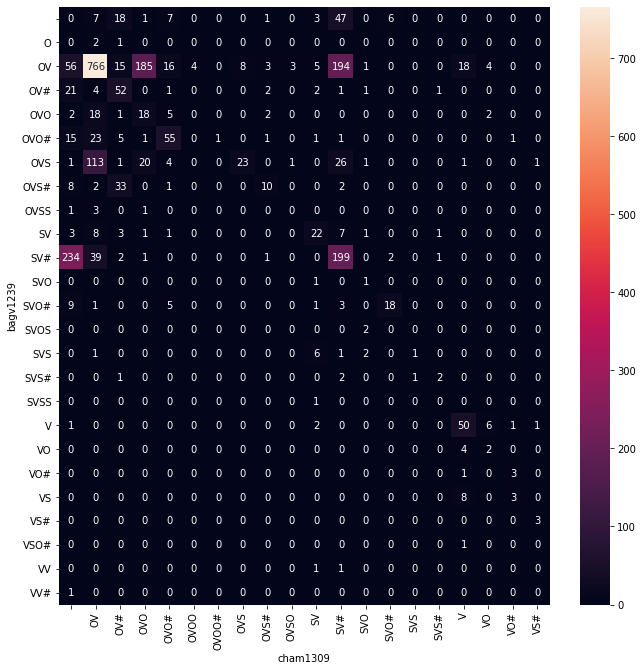

In [ ]:
cooccm(1, 2)

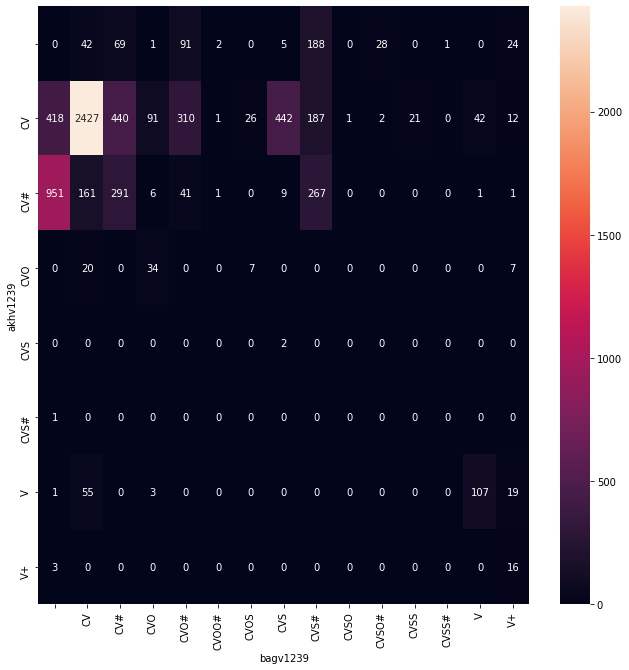

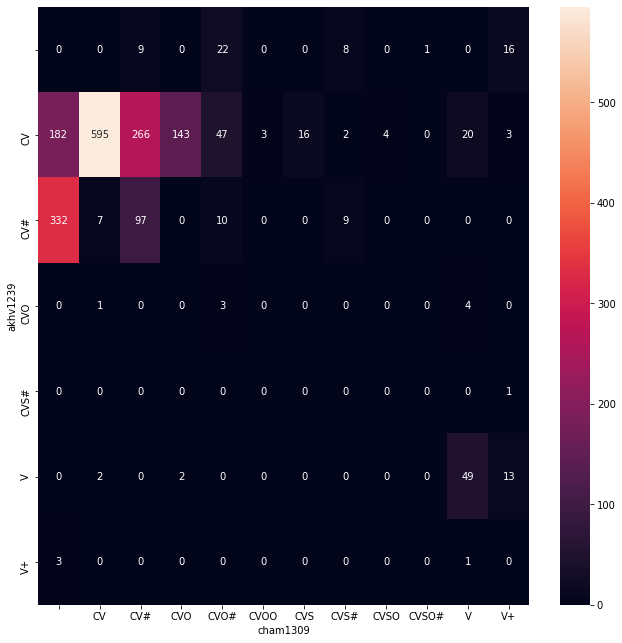

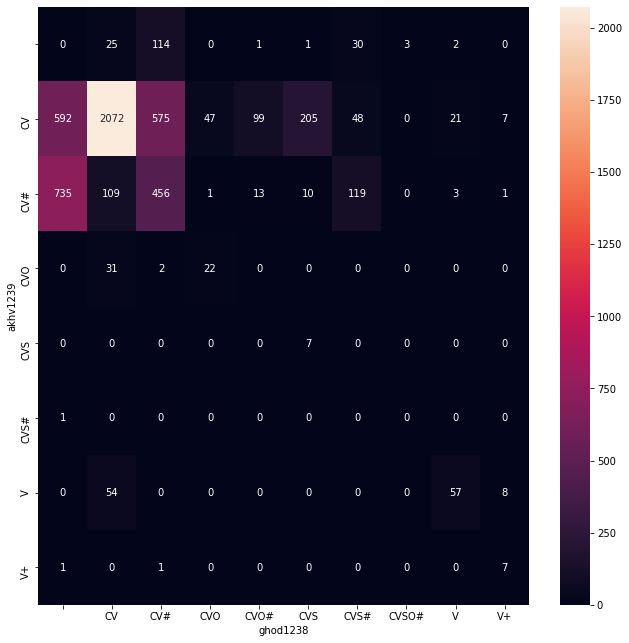

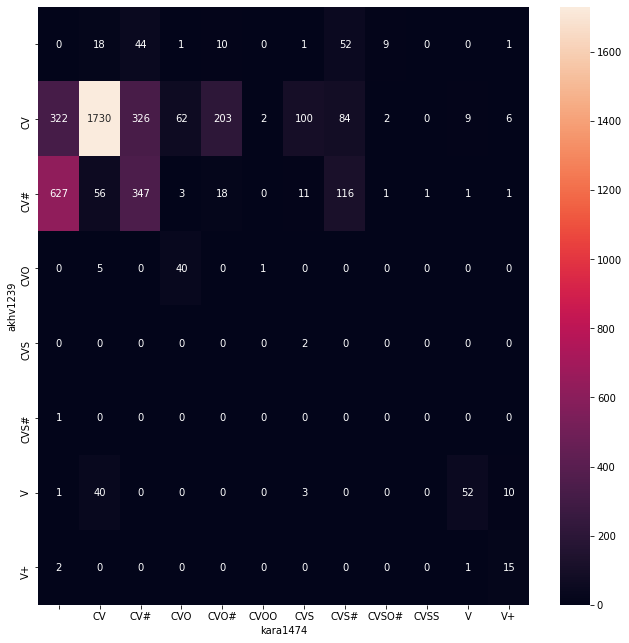

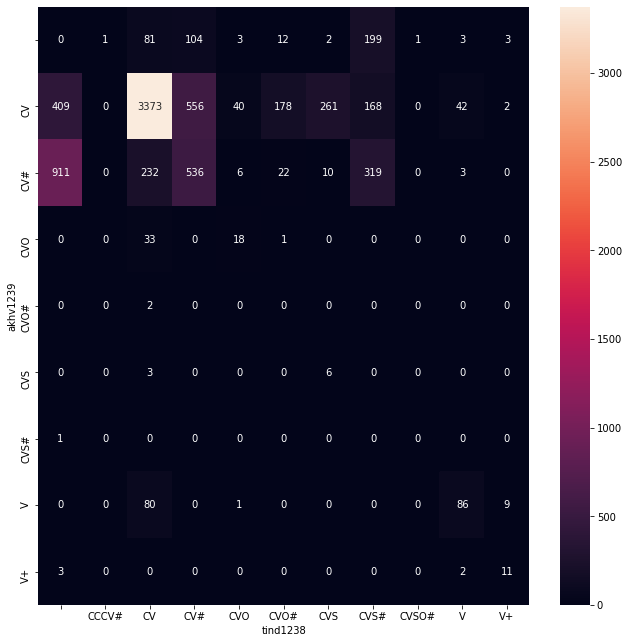

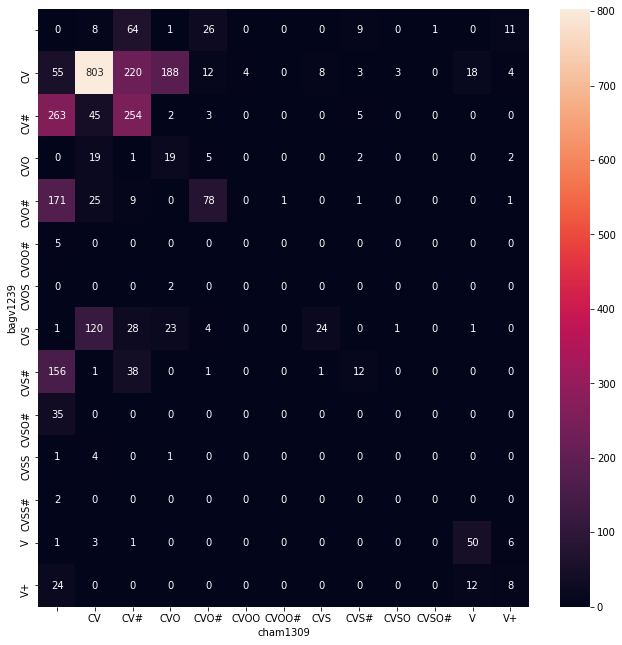

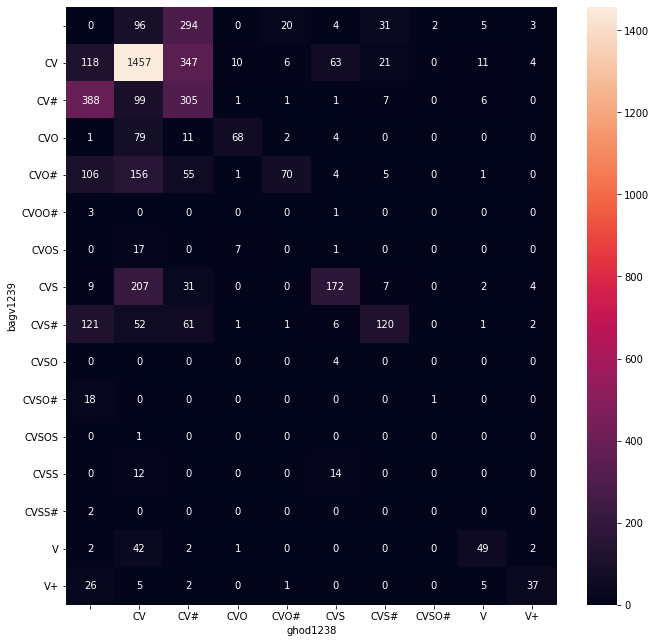

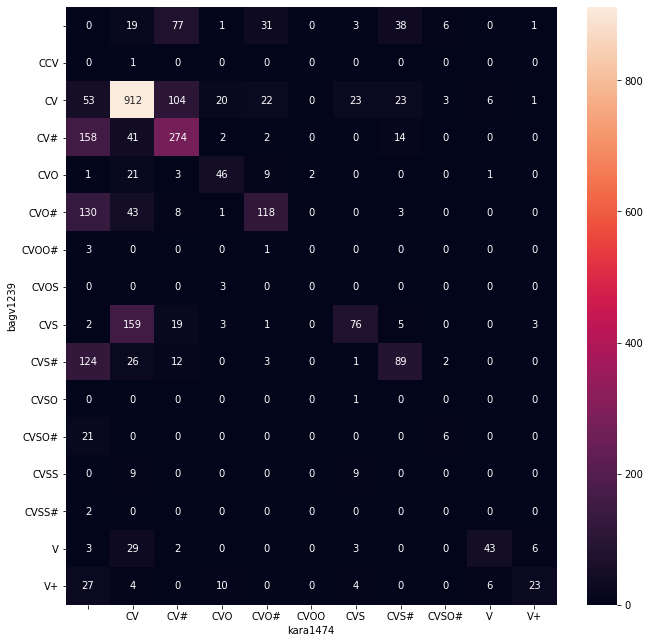

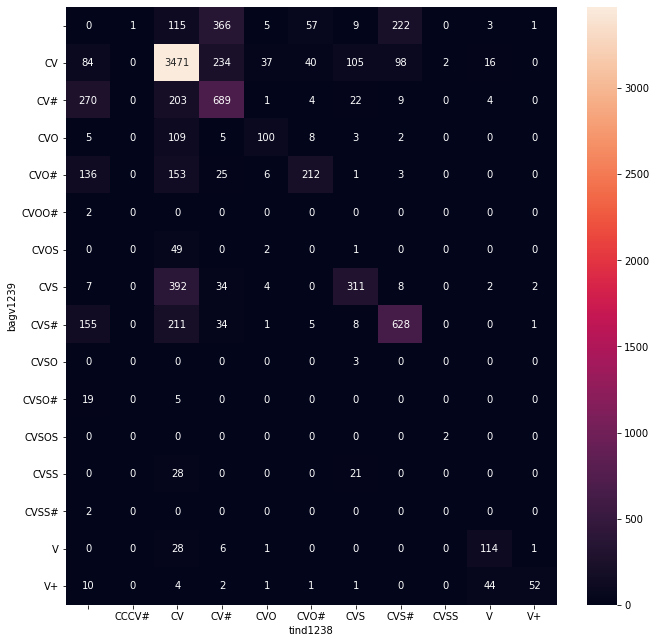

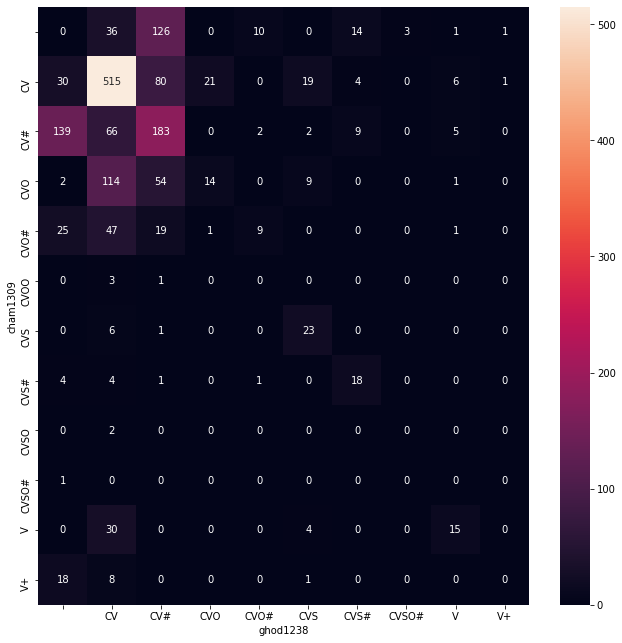

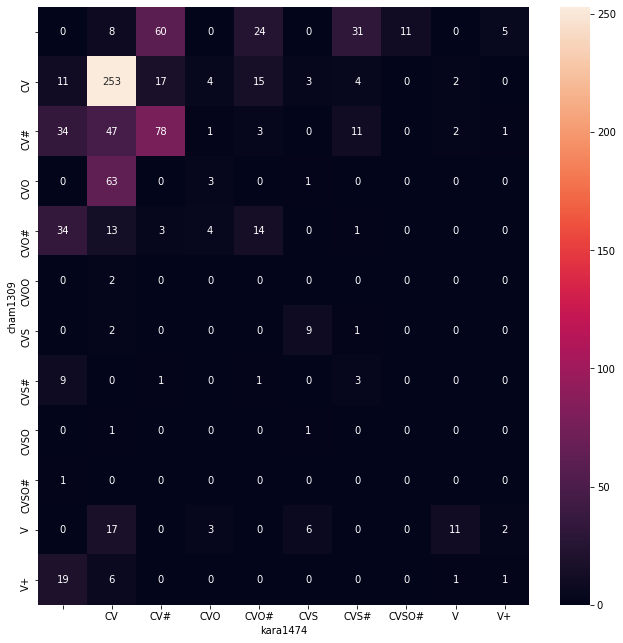

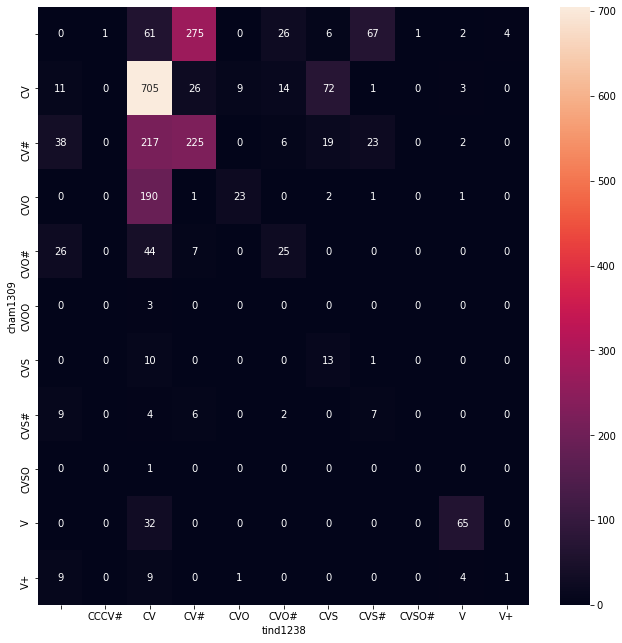

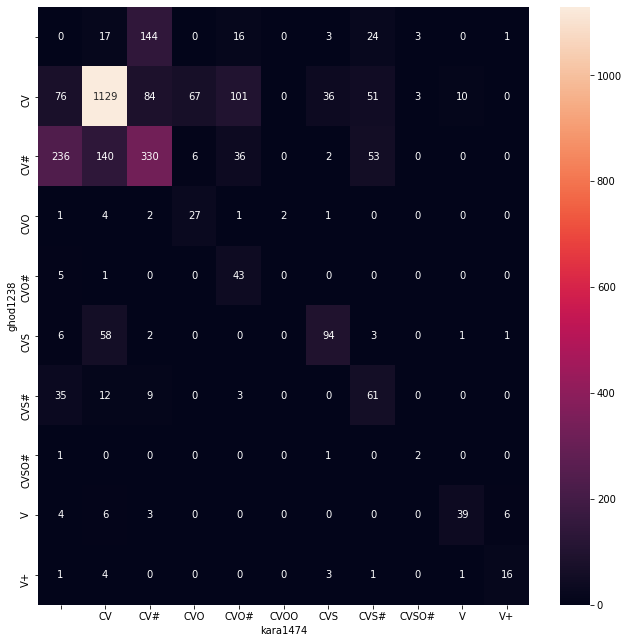

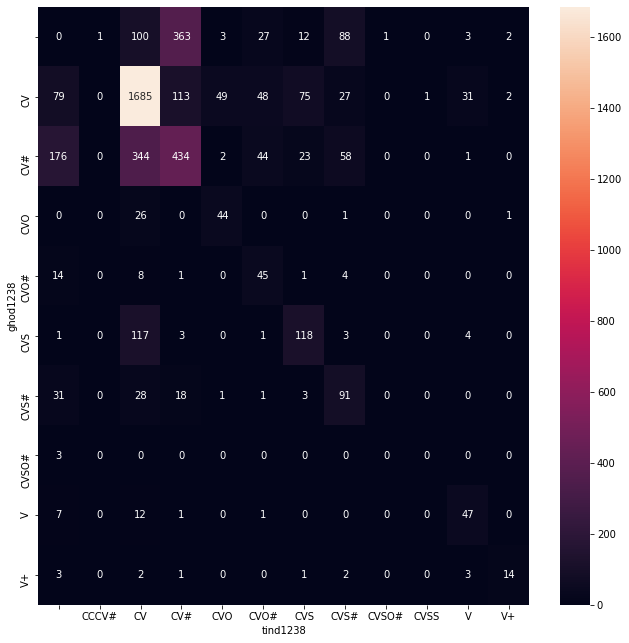

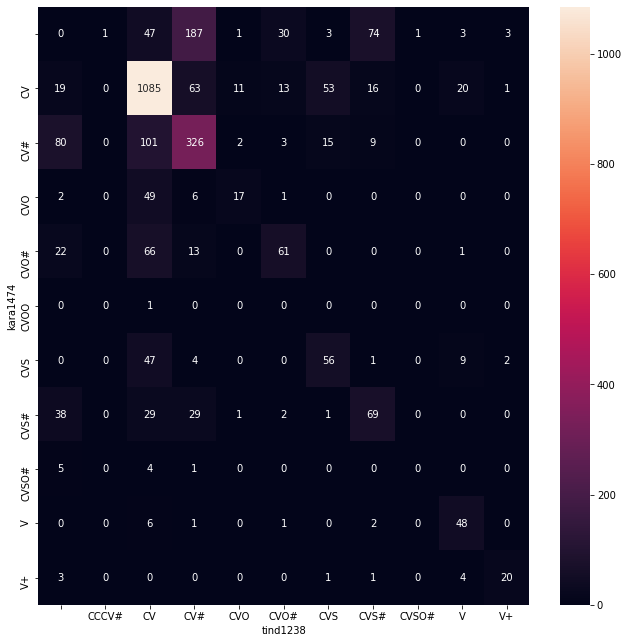

In [ ]:
for i in range(len(LANGS)-1):
  for j in range(len(LANGS)):
    if j > i:
      cooccm(i, j)

In [ ]:
df_dict['cham1309_tind1238']

,cham1309,tind1238
0,#OV,#OV
1,OV#,OV#
2,#OV,#OV
3,OV,OVO#
4,SVO#,
...,...,...
2306,OVO#,OVO#
2307,#OV,#OV
2308,OV#,OV#
2309,OVO#,
